In [2]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.patches as mpatches
sns.set_style("ticks")
sns.set_context("poster")

from synexp import *
from viz import *


/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# params = {'legend.fontsize': 'x-large',
#          'axes.labelsize': 'medium',
#          'axes.titlesize':'x-large',
#          'xtick.labelsize':'medium',
#          'ytick.labelsize':'medium'}
# pylab.rcParams.update(params)

In [2]:
a1 = [3, 4]
loaders = ['a', 'b']


    print(a)
    print(b)

3
a
4
b


In [3]:
X, Y, error_params = generate_syn_data(
    NS=1000,
    K=1,
    y0_pdf='piecewise_sinusoid',
    y1_pdf='low_base_rate_sinusoid',
    pi_pdf='linear',
    alpha_0=.2,
    alpha_1=.2,
    beta_0=0,
    beta_1=0,
    shuffle=False
)


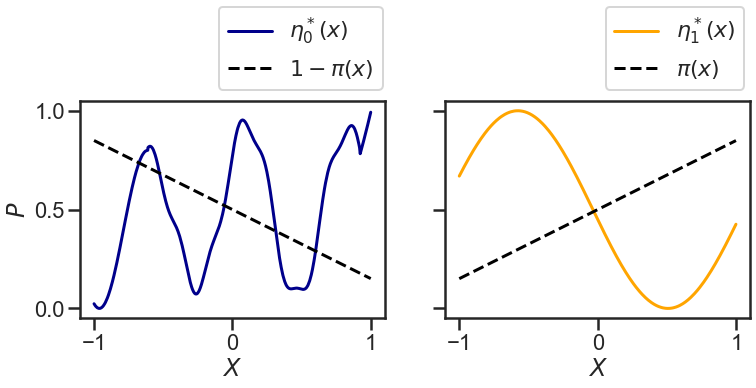

In [95]:
x = X.T.to_numpy().squeeze()
inds = np.argsort(x)
ys0sorted = Y['pYS_0'].to_numpy()[inds]
ys1sorted = Y['pYS_1'].to_numpy()[inds]
pd = Y['pD'].to_numpy()[inds]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
axes[0].plot(x[inds], ys0sorted, label='$\eta^*_0(x)$', color='darkblue')
axes[0].plot(x[inds], 1-pd, label='$1-\pi(x)$', color='black', linestyle='dashed')
axes[0].set_xlabel('$X$')
axes[0].set_ylabel('$P$')
axes[0].legend(bbox_to_anchor=(0.42, 1.0))


axes[1].plot(x[inds], ys1sorted, label='$\eta^*_1(x)$', color='orange')
axes[1].plot(x[inds], pd, label='$\pi(x)$', color='black', linestyle='dashed')
axes[1].set_xlabel('$X$')
axes[1].legend(bbox_to_anchor=(0.49, 1.0))

plt.savefig('figs/1D_synthetic_setup.png', bbox_inches = 'tight', dpi=500)


# 2D Linear Seperable

In [16]:
X, Y, error_params = generate_syn_data(
    NS=70,
    K=1,
    y0_pdf='2D_linsep_baseline',
    y1_pdf='2D_linsep_intervention',
    pi_pdf='6cov_linsep',
    alpha_0=0,
    alpha_1=0,
    beta_0=0,
    beta_1=0,
    shuffle=True
)


Text(0.5, 0, '$X_1$')

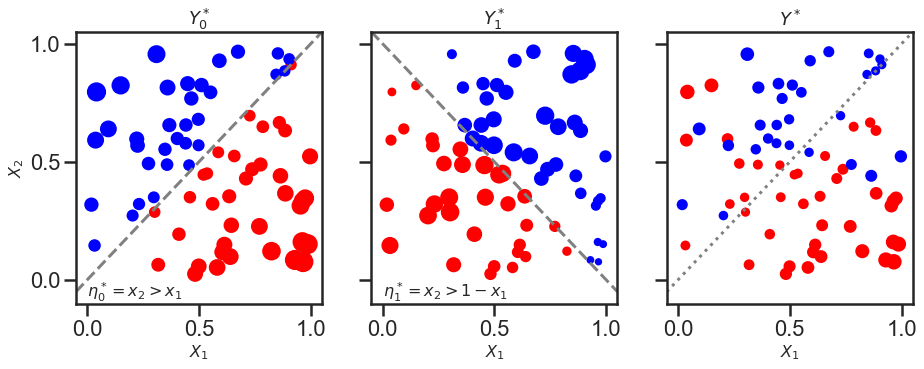

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

neg_baseline_X = X[Y['YS_0'] == 0]
pos_baseline_X = X[Y['YS_0'] == 1]
neg_baseline_Y = Y[Y['YS_0'] == 0]
pos_baseline_Y = Y[Y['YS_0'] == 1]

axes[0].axline((0, 0), slope=1, color='grey', linestyle='--')
axes[0].scatter(neg_baseline_X[[0]], neg_baseline_X[[1]], color='red', marker='o',  s=(18*(3.3*(1-neg_baseline_Y['pD']))**3.2))
axes[0].scatter(pos_baseline_X[[0]], pos_baseline_X[[1]], color='blue',marker='o', s=(18*(3.3*(1-pos_baseline_Y['pD']))**3.2))
axes[0].set_title('$Y^*_0$', fontsize=18)
axes[0].text(0, -.07, '$\eta^*_0 = x_2 > x_1$', fontsize = 16)
axes[0].set_ylim([-.1, 1.05])
axes[0].set_ylabel('$X_2$', fontsize=16)
axes[0].set_xlim([-.05, 1.05])
axes[0].set_xlabel('$X_1$', fontsize=16)
axes[0].set_yticks([0, .5, 1])

# plt.figure()
neg_intervention_X = X[Y['YS_1'] == 0]
pos_intervention_X = X[Y['YS_1'] == 1]
neg_intervention_Y = Y[Y['YS_1'] == 0]
pos_intervention_Y = Y[Y['YS_1'] == 1]
axes[1].axline((1, 0), slope=-1, color='grey', linestyle='--')
axes[1].scatter(neg_intervention_X[[0]], neg_intervention_X[[1]], color='red', marker='o', s=18*(5*neg_intervention_Y['pD'])**3)
axes[1].scatter(pos_intervention_X[[0]], pos_intervention_X[[1]], color='blue', marker='o', s=18*(5*pos_intervention_Y['pD'])**3)
axes[1].set_title('$Y^*_1$', fontsize=18)
axes[1].text(0, -.07, '$\eta^*_1 = x_2 > 1 - x_1$', fontsize = 16)
axes[1].set_ylim([-.1, 1.05])
axes[1].set_xlim([-.05, 1.05])
axes[1].set_xlabel('$X_1$', fontsize=16)




X_neg_obs = X[((Y['D'] == 0) & (Y['YS_0'] == 0)) | ((Y['D'] == 1) & (Y['YS_1'] == 0))]
X_pos_obs = X[((Y['D'] == 0) & (Y['YS_0'] == 1)) | ((Y['D'] == 1) & (Y['YS_1'] == 1))]

Y_neg_neg = Y[((Y['D'] == 0) & (Y['YS_0'] == 0)) | ((Y['D'] == 1) & (Y['YS_1'] == 0))]
Y_pos_obs = Y[((Y['D'] == 0) & (Y['YS_0'] == 1)) | ((Y['D'] == 1) & (Y['YS_1'] == 1))]

axes[2].axline((0, 0), slope=1, color='grey', linestyle=':')
axes[2].scatter(X_neg_obs[[0]], X_neg_obs[[1]], color='red', marker='o', s=(15*(3*(1-Y_neg_neg['pD']))**3))
axes[2].scatter(X_pos_obs[[0]], X_pos_obs[[1]], color='blue',marker='o',s=(15*(3*(1-Y_pos_obs['pD']))**3))

# axes[2].scatter(neg_intervention_X[[0]], neg_intervention_X[[1]], color='red', marker='x', s=18*(5*neg_intervention_Y['pD'])**3)
# axes[2].scatter(pos_intervention_X[[0]], pos_intervention_X[[1]], color='blue', marker='x', s=18*(5*pos_intervention_Y['pD'])**3)
axes[2].set_title('$Y^*$', fontsize=18)
axes[2].set_ylim([-.1, 1.05])
axes[2].set_xlim([-.05, 1.05])
axes[2].set_xlabel('$X_1$', fontsize=16)

